## Explainer notebook on how to load the data

In [2]:
%load_ext autoreload
# %load_ext line_profiler
%autoreload 2

In [2]:
import decoding_analysis_vis as dav  # package with custom functions of this repo 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
sns.set_palette('colorblind')

### Load a single session
- Give `sess_type` (`proj` or `sens`) and `session_id` (0 to 5 for both types)
- Some other arguments for normalisation, shuffling etc. 

In [3]:
Sess = dav.SimpleSession(verbose=1, session_id=0, sess_type='proj',
                        shuffle_trial_labels=False,
                        shuffle_timepoints=False,
                        shuffle_all_data=False,
                        prestim_baseline=False,
                        bool_filter_neurons=True)                   

session name : 2021-02-22_RL128.pkl
No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally
Excluded 893 out of 2308 neurons


In [4]:
Sess.save_full_ds()


Saved /media/thijs/hooghoudt/backup_ps2_2024-01-27/home/gin_repos/S1S2_mechanisms_data/pkl_files/projection_2sec_test/2021-02-22_RL128.nc


In [8]:
path_ds = '/media/thijs/hooghoudt/backup_ps2_2024-01-27/home/gin_repos/S1S2_mechanisms_data/nc_files/projection_2sec_test/2021-02-22_RL128.nc'
Sess = dav.SimpleSession(verbose=1, session_id=0, sess_type='proj',
                          filename_xarray_ds=path_ds)

The main data set is contained in `SimpleSession.full_ds`. It is stored in `xarray.Dataset` format, with various coordinates and variables attached. Example printed below:

In [9]:
Sess.full_ds

<xarray.Dataset>
Dimensions:                 (neuron: 1399, time: 182, trial: 300)
Coordinates:
  * neuron                  (neuron) int64 0 1 2 3 4 ... 1395 1396 1397 1398
  * time                    (time) float64 -2.063 -1.997 -1.93 ... 9.984 10.05
Data variables:
    activity                (neuron, time, trial) float32 -0.4538 ... 0.8464
    cell_s1                 (neuron) bool True True True ... True False True
    cell_id                 (neuron) int64 1 2 3 4 5 ... 4599 4600 4601 4604
    trial_type              (trial) <U14 'projecting' 'projecting' ... 'sham'
    frame_array             (time) int64 0 1 2 3 4 5 ... 176 177 178 179 180 181
    artefact_bool           (time) bool False False False ... False False False
    targets_projecting      (neuron) bool False False False ... False False
    targets_non_projecting  (neuron) bool False False False ... False False

Use `xarray` functionality to index parts of the data set by name, using e.g. `sel()`:

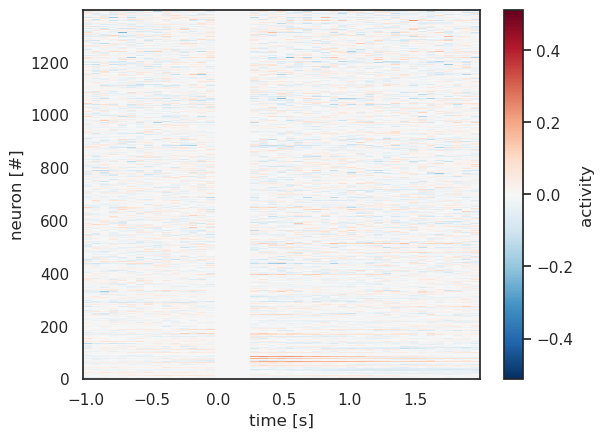

In [11]:
Sess.full_ds.sel(time=slice(-1, 2)).sel(neuron=Sess.full_ds.cell_s1).activity.mean('trial').plot()

### Selecting data:
To select data (e.g., a certain cell/trial combination), use the `SimpleSession.dataset_selector()` function for ease and speed:

In [ ]:
tmpr = Sess.dataset_selector(region='s1', frame_id=78, trial_type_list=['projecting', 'sham'], 
                            deepcopy=True) 

In [7]:
tmpr

<xarray.Dataset>
Dimensions:                 (neuron: 979, time: 1, trial: 200)
Coordinates:
  * neuron                  (neuron) int64 0 1 2 3 4 ... 1394 1395 1396 1398
  * time                    (time) float64 3.157
  * trial                   (trial) int64 0 1 2 3 4 5 ... 295 296 297 298 299
Data variables:
    activity                (neuron, time, trial) float32 -0.2052 ... 0.1372
    cell_s1                 (neuron) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    cell_id                 (neuron) float64 1.0 2.0 3.0 ... 4.6e+03 4.604e+03
    trial_type              (trial) <U14 'projecting' 'projecting' ... 'sham'
    frame_array             (time) int64 78
    artefact_bool           (time) bool False
    targets_projecting      (neuron) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    targets_non_projecting  (neuron) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

### Loading all sessions:
The class `AllSessions` loads all sessions of a particular session type (`sens` or `proj`). 

In [8]:
AllSesDict = {xx: dav.AllSessions(memory_efficient=True, sess_type=xx) for xx in ['sens', 'proj']}

session name : 2020-09-14_RL101.pkl
Excluded 602 out of 2169 neurons
session name : 2020-10-02_RL108.pkl
Excluded 969 out of 2563 neurons
session name : 2020-09-16_RL103.pkl
Excluded 461 out of 2106 neurons
session name : 2020-09-08_RL099.pkl
Excluded 276 out of 2095 neurons
session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons
session name : 2020-10-12_RL109.pkl
Excluded 843 out of 2515 neurons
Individual sessions loaded
session name : 2021-02-24_RL132.pkl
Excluded 757 out of 2156 neurons
session name : 2021-02-18_RL127.pkl
Excluded 833 out of 2334 neurons
session name : 2021-02-22_RL128.pkl
Excluded 893 out of 2308 neurons
session name : 2021-02-25_RL131.pkl
Excluded 1361 out of 2448 neurons
session name : 2021-03-02_RL130.pkl
Excluded 518 out of 2258 neurons
session name : 2021-02-23_RL129.pkl
Excluded 1323 out of 2364 neurons
Individual sessions loaded
